In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import re

# Define the locations of the points you want to connect as (longitude, latitude)
points = {
    'Seattle': (-122.3321, 47.6062),
    'San Francisco': (-122.4194, 37.7749),
    'Denver': (-104.9903, 39.7392),
    'Los Angeles': (-118.2437, 34.0522),
    'Chicago': (-87.6298, 41.8781),
    'Houston': (-95.3698, 29.7604),
    'Cleveland': (-81.6944, 41.4993),
    'Atlanta': (-84.3880, 33.7490),
    'Washington': (-77.0369, 38.9072),
    'Philadelphia': (-75.1652, 39.9526),
    'New York': (-74.0060, 40.7128),
    'Boston': (-71.0589, 42.3601)
}

# Define the lines between specific points
lines = [
    ('Seattle', 'Boston'),
    ('Seattle', 'Denver'),
    ('Seattle', 'San Francisco'),
    ('San Francisco', 'Denver'),
    ('San Francisco', 'Los Angeles'),
    ('Denver', 'Chicago'),
    ('Los Angeles', 'Houston'),
    ('Houston', 'Chicago'),
    ('Houston', 'Atlanta'),
    ('Chicago', 'Cleveland'),
    ('Cleveland', 'Boston'),
    ('Cleveland', 'New York'),
    ('Cleveland', 'Philadelphia'),
    ('Washington', 'Philadelphia'),
    ('Atlanta', 'Washington'),
    ('Atlanta', 'Philadelphia'),
    ('Philadelphia', 'New York'),
    ('New York', 'Boston'),
]

# Create a figure with axes set for the Mercator projection
fig, ax = plt.subplots(figsize=(25, 100), subplot_kw={'projection': ccrs.Mercator()})

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Set the extent of the map for the continental US
ax.set_extent([-125, -66.5, 24, 50], ccrs.Geodetic())

# Add a title to the map
# plt.title('Mapa de ciudades en EE. UU.', fontsize=25)

# Plot the lines
for start, end in lines:
    lon1, lat1 = points[start]
    lon2, lat2 = points[end]
    ax.plot([lon1, lon2], [lat1, lat2], color='blue', linewidth=1, marker='', transform=ccrs.Geodetic())
    
# Plot the points and add the names of the cities
for city, (lon, lat) in points.items():
    ax.plot(lon, lat, marker='o', color='red', markersize=10, transform=ccrs.Geodetic())
    ax.text(lon, lat, city, transform=ccrs.Geodetic(), ha='right', fontsize=12, weight='bold')

# Add a grid to the map
ax.grid(True)

# Save the figure to a file
plt.savefig('us_map_with_selected_cities_and_names.png')
plt.show()


In [2]:
import math

def haversine(lon1, lat1, lon2, lat2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert coordinates from degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in kilometers
    distance = R * c
    return distance

# Plot the lines and calculate distances
for start, end in lines:
    lon1, lat1 = points[start]
    lon2, lat2 = points[end]
    ax.plot([lon1, lon2], [lat1, lat2], color='blue', linewidth=1, marker='', transform=ccrs.Geodetic())
    
    # Calculate and display the distance
    distance = haversine(lon1, lat1, lon2, lat2) * 0.94
    print(f"Distance between {start} and {end}: {distance:.2f} km")


Distance between Seattle and Boston: 3760.06 km
Distance between Seattle and Denver: 1542.29 km
Distance between Seattle and San Francisco: 1027.62 km
Distance between San Francisco and Denver: 1433.03 km
Distance between San Francisco and Los Angeles: 525.57 km
Distance between Denver and Chicago: 1389.04 km
Distance between Los Angeles and Houston: 2073.89 km
Distance between Houston and Chicago: 1424.86 km
Distance between Houston and Atlanta: 1060.57 km
Distance between Chicago and Cleveland: 464.88 km
Distance between Cleveland and Boston: 831.36 km
Distance between Cleveland and New York: 610.86 km
Distance between Cleveland and Philadelphia: 541.71 km
Distance between Washington and Philadelphia: 186.47 km
Distance between Atlanta and Washington: 820.37 km
Distance between Atlanta and Philadelphia: 1006.71 km
Distance between Philadelphia and New York: 121.84 km
Distance between New York and Boston: 287.74 km


In [3]:
import numpy as np

# List of city names
cities = list(points.keys())

# Initialize a matrix of zeros
distance_matrix = np.zeros((len(cities), len(cities)))

# Populate the matrix with distances
for i, city1 in enumerate(cities):
    for j, city2 in enumerate(cities):
        if city1 != city2 and (city1, city2) in lines:
            lon1, lat1 = points[city1]
            lon2, lat2 = points[city2]
            distance_matrix[i, j] = haversine(lon1, lat1, lon2, lat2)
        elif city1 != city2 and (city2, city1) in lines:  # Check for reverse direction
            lon1, lat1 = points[city1]
            lon2, lat2 = points[city2]
            distance_matrix[i, j] = haversine(lon1, lat1, lon2, lat2)

print(distance_matrix.shape)


(12, 12)


In [4]:
distance_matrix = distance_matrix * 0.94
# distance_matrix.astype(int).tolist()
distance_matrix = distance_matrix.round(2).tolist()

In [5]:

# Node degrees
delta_values = [3, 3, 3, 2, 3, 3, 4, 3, 2, 4, 3, 3]

# Histogram generation
plt.figure(figsize=(10, 6))
plt.hist(delta_values, bins=range(1, 7), alpha=0.7, color='blue', edgecolor='black')

# Titles and labels
plt.title('Node Degree Histogram for the Extended (vBNS) backbone network')
plt.xlabel('Node Degree')
plt.ylabel('Frecuency')

# print histogram
plt.show()

In [6]:
matrix =   [[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
            [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0],
            [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]

In [7]:
import sys

def dijkstra(adj_matrix, start_vertex):
    # Número de vértices en la matriz
    n_vertices = len(adj_matrix)
    
    # Lista para almacenar la distancia más corta desde el inicio
    shortest_path = [sys.maxsize] * n_vertices
    shortest_path[start_vertex] = 0

    # Conjunto para llevar el registro de los vértices incluidos en el camino más corto
    visited = [False] * n_vertices

    for _ in range(n_vertices):
        # Encuentra el vértice con la distancia mínima desde el conjunto de vértices aún no procesados
        min_distance = sys.maxsize
        for v in range(n_vertices):
            if shortest_path[v] < min_distance and not visited[v]:
                min_distance = shortest_path[v]
                min_vertex = v

        # Marcar el vértice elegido como visitado
        visited[min_vertex] = True

        # Actualizar la distancia de los vértices adyacentes
        for v in range(n_vertices):
            if adj_matrix[min_vertex][v] > 0 and not visited[v] and \
               shortest_path[v] > shortest_path[min_vertex] + adj_matrix[min_vertex][v]:
                shortest_path[v] = shortest_path[min_vertex] + adj_matrix[min_vertex][v]

    return shortest_path


# Aplicar el algoritmo desde el vértice 0
shortest_paths_from_0 = dijkstra(distance_matrix, 2)
print(shortest_paths_from_0)


[1542.29, 1433.03, 0, 1958.6, 1389.04, 2813.8999999999996, 1853.92, 3402.34, 2582.1, 2395.63, 2464.78, 2685.28]


In [8]:
def dijkstra_with_path(adj_matrix, start_vertex):
    n_vertices = len(adj_matrix)
    
    shortest_path = [sys.maxsize] * n_vertices
    shortest_path[start_vertex] = 0

    visited = [False] * n_vertices

    # Almacenar el predecesor de cada nodo
    predecessor = [-1] * n_vertices

    for _ in range(n_vertices):
        min_distance = sys.maxsize
        for v in range(n_vertices):
            if shortest_path[v] < min_distance and not visited[v]:
                min_distance = shortest_path[v]
                min_vertex = v

        visited[min_vertex] = True

        for v in range(n_vertices):
            if adj_matrix[min_vertex][v] > 0 and not visited[v] and \
               shortest_path[v] > shortest_path[min_vertex] + adj_matrix[min_vertex][v]:
                shortest_path[v] = shortest_path[min_vertex] + adj_matrix[min_vertex][v]
                predecessor[v] = min_vertex
    
    return shortest_path, predecessor

def reconstruct_path(predecessor, start_vertex, end_vertex):
    path = []
    current = end_vertex

    while current != start_vertex:
        if current == -1:
            return None  # Camino no existe
        path.insert(0, current)
        current = predecessor[current]

    path.insert(0, start_vertex)
    return path

# Usando la función modificada
shortest_paths, predecessors = dijkstra_with_path(matrix, 0)


# Ejemplo: Reconstruir el camino del vértice 0 al 8
path_0_to_8 = reconstruct_path(predecessors, 0, 8)
shortest_paths, path_0_to_8



([0, 1.0, 1.0, 2.0, 2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 2.0, 1.0], [0, 11, 6, 9, 8])

In [9]:
paths = open("input_file.txt", "r")

uw_distance_matrix = np.zeros((len(matrix),len(matrix)))

lines = paths.readlines()
regex_nodos = r"^Path: \[(\d+).*?(\d+)\]$"

# La expresión regular para extraer el número
regex_numero = r"Dist: (\d+\.\d+)"

    
for line in lines:
    line = line.strip().split(';')
    path = line[0].strip()
    match_path = re.search(regex_nodos,path)

    if match_path:
        source = int(match_path.group(1))
        destination = int(match_path.group(2))
    else:
        print("Not String path found")

    
    distance = line[1].strip()
    match_distance = re.search(regex_numero, distance)
    
    if match_distance:
        distance = float(match_distance.group(1))
    else:
        print("No valid found Distance")
    
    uw_distance_matrix[source-1, destination-1] = distance

uw_distance_matrix.astype(int).tolist()

[[0, 1, 1, 2, 2, 3, 2, 4, 4, 3, 2, 1],
 [1, 0, 1, 1, 2, 2, 3, 3, 4, 4, 3, 2],
 [1, 1, 0, 2, 1, 2, 2, 3, 4, 3, 3, 2],
 [2, 1, 2, 0, 2, 1, 3, 2, 3, 3, 4, 3],
 [2, 2, 1, 2, 0, 1, 1, 2, 3, 2, 2, 2],
 [3, 2, 2, 1, 1, 0, 2, 1, 2, 2, 3, 3],
 [2, 3, 2, 3, 1, 2, 0, 2, 2, 1, 1, 1],
 [4, 3, 3, 2, 2, 1, 2, 0, 1, 1, 2, 3],
 [4, 4, 4, 3, 3, 2, 2, 1, 0, 1, 2, 3],
 [3, 4, 3, 3, 2, 2, 1, 1, 1, 0, 1, 2],
 [2, 3, 3, 4, 2, 3, 1, 2, 2, 1, 0, 1],
 [1, 2, 2, 3, 2, 3, 1, 3, 3, 2, 1, 0]]

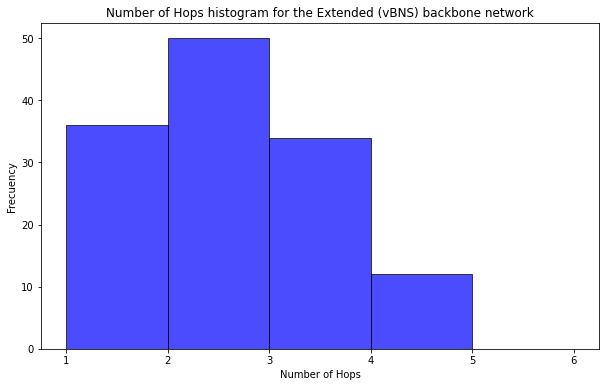

In [10]:
delta_values = uw_distance_matrix.astype(int).tolist()
flat_data = [val for row in delta_values for val in row]

# Histogram generation
plt.figure(figsize=(10, 6))
plt.hist(flat_data, bins=range(1, 7), alpha=0.7, color='blue', edgecolor='black')

# Titles and labels
plt.title('Number of Hops histogram for the Extended (vBNS) backbone network')
plt.xlabel('Number of Hops')
plt.ylabel('Frecuency')

# print histogram
plt.show()

In [11]:
paths = open("input_weighted_distances.txt", "r")

w_distance_matrix = np.zeros((len(matrix),len(matrix)))

lines = paths.readlines()
regex_nodos = r"^Path: \[(\d+).*?(\d+)\]$"

# La expresión regular para extraer el número
regex_numero = r"Dist: (\d+\.\d+)"

    
for line in lines:
    line = line.strip().split(';')
    path = line[0].strip()
    match_path = re.search(regex_nodos,path)

    if match_path:
        source = int(match_path.group(1))
        destination = int(match_path.group(2))
    else:
        print("Not String path found")

    
    distance = line[1].strip()
    match_distance = re.search(regex_numero, distance)
    
    if match_distance:
        distance = float(match_distance.group(1))
    else:
        print("No valid found Distance")
    
    w_distance_matrix[source-1, destination-1] = distance

w_distance_matrix.round(2).tolist()

[[0.0,
  1027.62,
  1542.29,
  1553.19,
  2931.33,
  3627.08,
  3396.21,
  4687.65,
  4124.39,
  3937.92,
  4007.07,
  3760.06],
 [1027.62,
  0.0,
  1433.03,
  525.57,
  2822.07,
  2599.46,
  3286.95,
  3660.03,
  4015.13,
  3828.66,
  3897.81,
  4118.31],
 [1542.29,
  1433.03,
  0.0,
  1958.6,
  1389.04,
  2813.9,
  1853.92,
  3402.34,
  2582.1,
  2395.63,
  2464.78,
  2685.28],
 [1553.19,
  525.57,
  1958.6,
  0.0,
  3347.64,
  2073.89,
  3812.52,
  3134.46,
  3954.83,
  4141.17,
  4263.01,
  4550.75],
 [2931.33,
  2822.07,
  1389.04,
  3347.64,
  0.0,
  1424.86,
  464.88,
  2013.3,
  1193.06,
  1006.59,
  1075.74,
  1296.24],
 [3627.08,
  2599.46,
  2813.9,
  2073.89,
  1424.86,
  0.0,
  1889.74,
  1060.57,
  1880.94,
  2067.28,
  2189.12,
  2476.86],
 [3396.21,
  3286.95,
  1853.92,
  3812.52,
  464.88,
  1889.74,
  0.0,
  1548.42,
  728.18,
  541.71,
  610.86,
  831.36],
 [4687.65,
  3660.03,
  3402.34,
  3134.46,
  2013.3,
  1060.57,
  1548.42,
  0.0,
  820.37,
  1006.71,
  1128.

In [17]:
delta_values = w_distance_matrix.round(2).tolist()
flat_data = [val for row in delta_values for val in row]

# Histogram generation
plt.figure(figsize=(10, 6))
plt.hist(flat_data, bins=10, alpha=0.7, color='blue', edgecolor='black')

# Titles and labels
plt.title('Distances histogram for the Extended (vBNS) backbone network')
plt.xlabel('Number of Hops')
plt.ylabel('Frecuency')

# print histogram
plt.show()

In [13]:
flat_data

[0.0,
 1027.62,
 1542.29,
 1553.19,
 2931.33,
 3627.08,
 3396.21,
 4687.65,
 4124.39,
 3937.92,
 4007.07,
 3760.06,
 1027.62,
 0.0,
 1433.03,
 525.57,
 2822.07,
 2599.46,
 3286.95,
 3660.03,
 4015.13,
 3828.66,
 3897.81,
 4118.31,
 1542.29,
 1433.03,
 0.0,
 1958.6,
 1389.04,
 2813.9,
 1853.92,
 3402.34,
 2582.1,
 2395.63,
 2464.78,
 2685.28,
 1553.19,
 525.57,
 1958.6,
 0.0,
 3347.64,
 2073.89,
 3812.52,
 3134.46,
 3954.83,
 4141.17,
 4263.01,
 4550.75,
 2931.33,
 2822.07,
 1389.04,
 3347.64,
 0.0,
 1424.86,
 464.88,
 2013.3,
 1193.06,
 1006.59,
 1075.74,
 1296.24,
 3627.08,
 2599.46,
 2813.9,
 2073.89,
 1424.86,
 0.0,
 1889.74,
 1060.57,
 1880.94,
 2067.28,
 2189.12,
 2476.86,
 3396.21,
 3286.95,
 1853.92,
 3812.52,
 464.88,
 1889.74,
 0.0,
 1548.42,
 728.18,
 541.71,
 610.86,
 831.36,
 4687.65,
 3660.03,
 3402.34,
 3134.46,
 2013.3,
 1060.57,
 1548.42,
 0.0,
 820.37,
 1006.71,
 1128.55,
 1416.29,
 4124.39,
 4015.13,
 2582.1,
 3954.83,
 1193.06,
 1880.94,
 728.18,
 820.37,
 0.0,
 186.